霍夫轉換（Hough Transform）是一種圖像分析技術，用於檢測圖像中的幾何形狀，例如直線和圓形。它由Paul Hough於1962年提出，最初用於檢測直線，後來擴展到其他形狀。霍夫轉換的核心思想是將圖像空間的問題轉換為參數空間，通過在參數空間中尋找累積值來實現檢測。

### 霍夫轉換的基本原理

1. **參數空間轉換**：
   - 在圖像空間中，檢測到的形狀（如直線或圓形）可以轉換為參數空間中的點。這樣做的目的是將形狀的檢測問題轉換為在參數空間中尋找模式的問題。

2. **直線霍夫轉換**：
   - **直線方程**：在圖像空間中，直線可以表示為 `y = mx + b`，其中 `m` 是斜率，`b` 是截距。霍夫轉換使用另一種參數化方式 `ρ = x * cos(θ) + y * sin(θ)`，其中 `ρ` 是直線到原點的距離，`θ` 是直線的角度。
   - **參數空間**：在霍夫空間中，直線被表示為 `(ρ, θ)` 的點。這樣，圖像中的每一個點（邊緣點）都會對參數空間中的一條曲線做貢獻，這條曲線表示所有可能的直線。

3. **累加器**：
   - **累加器**：在參數空間中，使用累加器（即一個二維矩陣）來存儲每個 `(ρ, θ)` 的計數。每當圖像中的一個邊緣點對應到參數空間中的一條曲線時，該點在累加器中對應的區域會增加計數。
   - **找到直線**：當累加器中的某些區域的計數超過一定閾值時，這些區域對應的 `(ρ, θ)` 就代表了圖像中的一條直線。

### 霍夫轉換步驟

1. **邊緣檢測**：
   - 首先，對圖像進行邊緣檢測，以找到圖像中的邊緣點。常見的邊緣檢測方法包括Canny邊緣檢測。

2. **參數化**：
   - 對每一個邊緣點 `(x, y)`，計算所有可能的 `(ρ, θ)` 參數值。這些值表示通過該邊緣點的所有可能直線。

3. **填充累加器**：
   - 在參數空間的累加器中增加相應的計數值，根據邊緣點對應的直線參數 `(ρ, θ)`。

4. **尋找峰值**：
   - 在累加器中尋找計數值超過閾值的峰值，這些峰值代表圖像中的直線。

### 霍夫轉換的優點與缺點

**優點**：
- **魯棒性**：能夠檢測到圖像中不完整或被遮擋的直線。
- **不受噪聲影響**：對邊緣的輕微噪聲和缺陷具有一定的魯棒性。

**缺點**：
- **計算複雜度**：參數空間的計算可能會消耗大量計算資源，尤其是在高分辨率圖像中。
- **需要設置參數**：例如閾值、最小線長等參數需要根據圖像特性進行調整。

### 例子：直線霍夫轉換

以直線霍夫轉換為例，以下是簡單的Python範例程式碼：

這段程式碼展示了如何使用霍夫轉換檢測圖像中的直線，通過邊緣檢測和參數空間中的累積來找出直線。

In [ ]:
!curl -o F:\Code\Digtal-Image-Processing\Code\Resources\Data\road.jpg https://www.erv-nsa.gov.tw/social-article/547

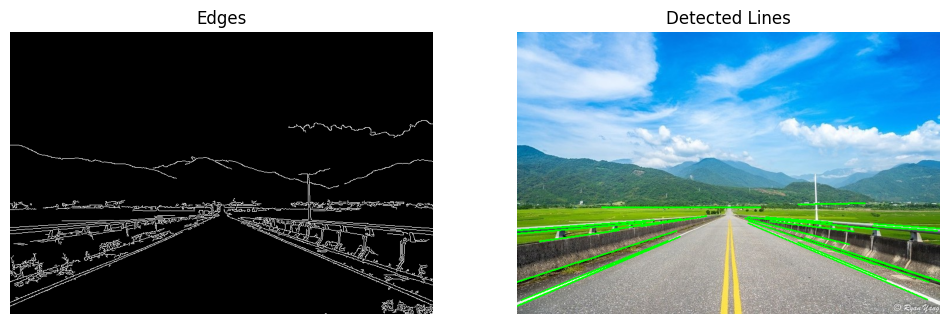

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖像並轉換為灰階
image_path = r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\road.jpg'  # 請更改為你的圖像路徑
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 使用Canny邊緣檢測
edges = cv2.Canny(gray, 100, 500)

# 使用霍夫直線變換檢測直線
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# 複製圖像以顯示檢測結果
line_image = image.copy()

# 繪製檢測到的直線
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 顯示結果
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
axes[0].set_title('Edges')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Detected Lines')
axes[1].axis('off')

plt.show()


隨機式測線方法（Random Sampling Method for Line Detection）是一種在計算機視覺和圖像處理中使用的技術，主要用於從圖像中檢測直線或其他幾何形狀。這種方法通常使用隨機樣本來估計圖像中的直線參數，從而提高檢測的效率和準確性。以下是這種方法的基本概念和一個常見的實現方式：RANSAC（Random Sample Consensus）。

### RANSAC（隨機樣本一致性算法）

RANSAC是一種迭代方法，用於從包含異常值的數據中估計參數模型。這種方法特別適用於處理圖像中的直線檢測，尤其是當數據中有大量噪聲或異常值時。

#### 基本概念

1. **隨機選擇樣本**：
   - 從所有觀測數據中隨機選擇一組樣本，用於擬合模型。這些樣本通常是直線上的點。

2. **模型擬合**：
   - 使用選擇的樣本擬合模型（例如直線方程），計算模型參數。

3. **評估模型**：
   - 對於所有數據點，檢查它們是否符合擬合的模型。計算每個數據點到模型的距離，並根據這些距離來評估模型的質量。

4. **選擇最佳模型**：
   - 根據評估結果選擇最適合的模型。這個模型應該是對大多數數據點有效的，並且具有最少的異常值。

5. **迭代**：
   - 重複這個過程多次，直到找到最佳的模型或達到指定的迭代次數。

#### 實現方式

以下是使用OpenCV庫實現RANSAC進行直線檢測的Python範例：

### RANSAC的步驟

1. **初始化**：
   - 設置最大迭代次數和模型評估的閾值。

2. **隨機樣本選擇**：
   - 隨機選擇一組點，這些點用於擬合直線模型。

3. **模型擬合**：
   - 使用選擇的點計算直線參數（例如，斜率和截距）。

4. **模型評估**：
   - 計算其他點到擬合直線的距離，並計算這些點的支持度。

5. **最佳模型選擇**：
   - 更新最佳模型，如果當前模型的支持度比之前的模型高。

6. **重複**：
   - 重複上述過程，直到達到最大迭代次數或找到滿意的模型。

### RANSAC的優點與缺點

**優點**：
- **魯棒性**：對異常值（例如噪聲或遮擋）具有良好的魯棒性。
- **簡單易用**：實現相對簡單，並且在實際應用中效果顯著。

**缺點**：
- **計算資源**：需要多次迭代，可能會消耗大量計算資源。
- **參數選擇**：需要設置合理的參數，如迭代次數和閾值，這對於結果的質量至關重要。

隨機式測線方法是一種強大的工具，特別是在處理帶有噪聲的圖像數據時。RANSAC算法的靈活性和魯棒性使其在許多計算機視覺應用中得到了廣泛應用。

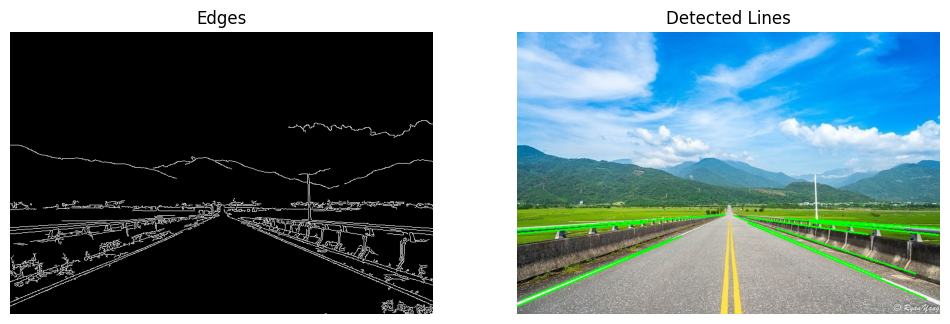

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖像並轉換為灰階
image_path = r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\road.jpg'  # 請更改為你的圖像路徑
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 使用Canny邊緣檢測
edges = cv2.Canny(gray, 100, 500)

# 使用霍夫轉換檢測直線
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=200, maxLineGap=10)

# 繪製檢測到的直線
line_image = image.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 顯示結果
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
axes[0].set_title('Edges')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Detected Lines')
axes[1].axis('off')

plt.show()

In [7]:
!curl -o F:\Code\Digtal-Image-Processing\Code\Resources\Data\curl_road.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/A_Road_in_Ping_Tung.jpg/220px-A_Road_in_Ping_Tung.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 16799  100 16799    0     0  51653      0 --:--:-- --:--:-- --:--:-- 52009


Kluge的道路偵測RANSAC方法是一種改進的RANSAC（Random Sample Consensus）方法，專門用於道路和車道線的檢測。該方法由Kluge等人提出，旨在提高在複雜場景中檢測道路和車道線的準確性和穩定性。它主要基於傳統的RANSAC算法，但在以下幾個方面進行了改進，以適應道路檢測的特殊需求：

### Kluge的道路偵測RANSAC方法的主要特點

1. **增強的樣本選擇策略**：
   - **多樣本選擇**：與傳統RANSAC不同，Kluge的方法使用多個隨機樣本來擬合多條車道線或道路邊界。這種策略可以提高檢測的魯棒性和準確性。

2. **優化的模型評估**：
   - **車道線模型**：Kluge的方法針對車道線的特性進行優化，例如車道線的曲率和車道線的長度限制，從而提高模型的匹配精度。
   - **距離度量**：使用改進的距離度量來評估點到車道線的匹配程度，以更好地處理非線性變形和噪聲。

3. **高效的錯誤處理**：
   - **異常值處理**：改進的錯誤處理技術可以更好地識別和處理圖像中的異常值和噪聲，從而提高檢測結果的準確性。

4. **逐步擴展**：
   - **局部擴展**：在找到初步車道線後，Kluge的方法可以進行局部擴展來檢測更長的車道線段，提高檢測的完整性。

### 實現Kluge的道路偵測RANSAC方法的基本步驟

以下是一個簡化的Python範例，展示如何使用RANSAC進行車道線檢測，雖然這個範例不是Kluge方法的完整實現，但展示了如何進行道路和車道線檢測。

### Kluge的改進策略

1. **多模型檢測**：
   - 這個策略可以擴展到檢測多條車道線，通過改進的RANSAC算法來同時檢測多個模型。

2. **分層篩選**：
   - 分層篩選方法可以在多個模型中選擇最佳的車道線，並在局部區域進行擴展，以提高檢測的準確性。

3. **非線性擬合**：
   - 使用改進的模型來處理車道線的曲率和彎曲，從而更好地適應實際道路場景。

### 結論

Kluge的道路偵測RANSAC方法是一種有效的改進技術，通過改進樣本選擇、模型評估和錯誤處理來提高道路和車道線的檢測準確性。在實際應用中，這種方法可以顯著提升自動駕駛和車道保持系統的性能。

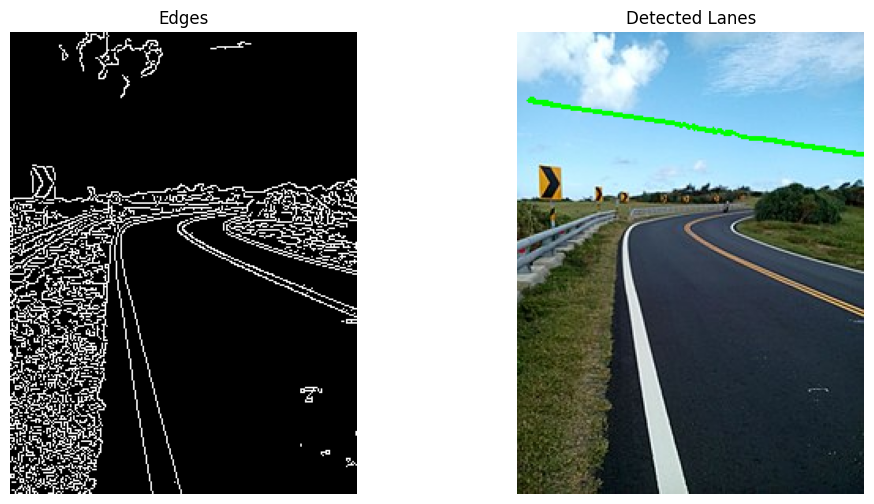

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_lanes(image_path):
    # 讀取圖像並轉換為灰階
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 使用Canny邊緣檢測
    edges = cv2.Canny(gray, 50, 150)

    # 霍夫直線變換進行直線檢測
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=100, maxLineGap=10)

    # 複製圖像以顯示檢測結果
    line_image = image.copy()

    # 繪製檢測到的直線
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # 顯示結果
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Edges')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Detected Lanes')
    axes[1].axis('off')

    plt.show()

# 測試路徑
image_path = 'your_image.jpg'  # 請更改為你的圖像路徑
detect_lanes(image_path)

RANSAC (Random Sample Consensus) 是一種常用於道路偵測中的方法，可以有效地從大量雜訊數據中提取出有用的資訊。你提到的數學式：

\[ c = \frac{k}{r} + \beta \cdot r + v \]

其中：
- \( c \) 代表預測的參數（例如道路的彎曲度）
- \( k \) 和 \( \beta \) 是模型的參數
- \( r \) 是距離參數
- \( v \) 是誤差項

這個方程式的一個常見應用是用來描述道路邊緣或中線的曲率。

### Python 代碼示例

以下是一個使用 RANSAC 的 Python 代碼示例，來進行道路偵測。這個代碼使用了 `sklearn` 庫中的 RANSAC 迴歸模型。

### 代碼解釋
1. **數據生成**：生成模擬數據，其中包括距離參數 `r` 和曲率參數 `c`。曲率參數由公式計算，並添加一些隨機噪聲。
2. **模型訓練**：使用 `RANSACRegressor` 訓練模型，以擬合曲線。
3. **預測與可視化**：使用訓練好的模型對新數據進行預測，並繪製原始數據點和預測曲線。

這段代碼展示了如何使用 RANSAC 方法進行道路偵測。你可以根據具體的應用場景進行調整，例如使用不同的特徵或數據預處理方法來改進模型的效果。

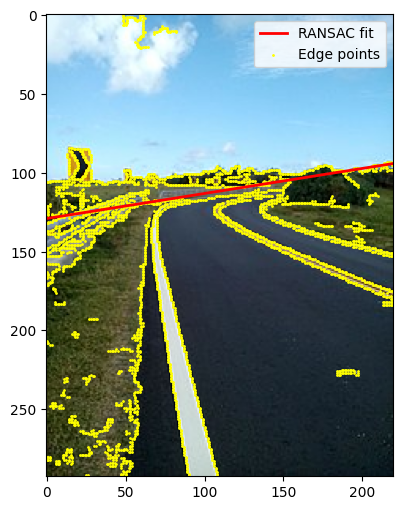

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor

# 讀取圖片
image = cv2.imread('F:\Code\Digtal-Image-Processing\Code\Resources\Data\curl_road.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 邊緣檢測
edges = cv2.Canny(gray, 150, 300, apertureSize=3)

# 提取候選點
points = np.column_stack(np.where(edges > 0))

# 構建RANSAC模型
ransac = RANSACRegressor(residual_threshold=5.0, random_state=42)

# 提取x和y坐標
X = points[:, 1].reshape(-1, 1)  # x座標
y = points[:, 0]  # y座標

# 訓練RANSAC模型
ransac.fit(X, y)

# 生成預測值
line_x = np.arange(image.shape[1]).reshape(-1, 1)
line_y_ransac = ransac.predict(line_x)

# 繪製結果
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.plot(line_x, line_y_ransac, color='red', linewidth=2, label='RANSAC fit')
plt.scatter(X, y, color='yellow', s=1, label='Edge points')
plt.legend()
plt.show()


C:\Users\112033645\AppData\Local\Temp\ipykernel_4508\941968312.py:20: RuntimeWarning: divide by zero encountered in divide
  return self.k_ / r + self.beta_ * r + self.v_
C:\Users\112033645\AppData\Local\Temp\ipykernel_4508\941968312.py:20: RuntimeWarning: divide by zero encountered in divide
  return self.k_ / r + self.beta_ * r + self.v_
C:\Users\112033645\AppData\Local\Temp\ipykernel_4508\941968312.py:20: RuntimeWarning: divide by zero encountered in divide
  return self.k_ / r + self.beta_ * r + self.v_
C:\Users\112033645\AppData\Local\Temp\ipykernel_4508\941968312.py:15: RuntimeWarning: divide by zero encountered in divide
  self.v_ = np.mean(y - (self.k_ / r + self.beta_ * r))
C:\Users\112033645\AppData\Local\Temp\ipykernel_4508\941968312.py:20: RuntimeWarning: invalid value encountered in add
  return self.k_ / r + self.beta_ * r + self.v_
C:\Users\112033645\AppData\Local\Temp\ipykernel_4508\941968312.py:20: RuntimeWarning: divide by zero encountered in divide
  return self.k_ /

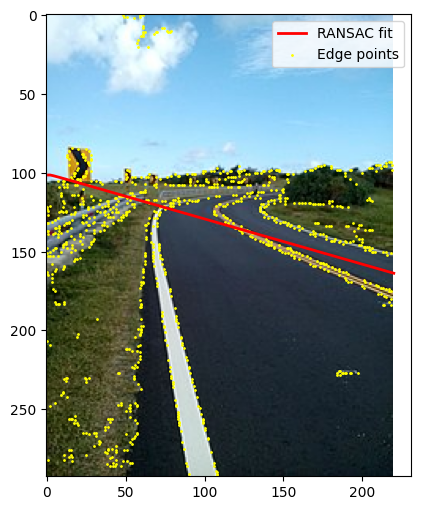

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
from sklearn.base import BaseEstimator, RegressorMixin

class CustomRoadModel(BaseEstimator, RegressorMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        r = X[:, 0]
        self.k_ = np.random.rand()
        self.beta_ = np.random.rand()
        self.v_ = np.mean(y - (self.k_ / r + self.beta_ * r))
        return self

    def predict(self, X):
        r = X[:, 0]
        return self.k_ / r + self.beta_ * r + self.v_

# 讀取圖片
image = cv2.imread('F:\Code\Digtal-Image-Processing\Code\Resources\Data\curl_road.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 邊緣檢測
edges = cv2.Canny(gray, 150, 300, apertureSize=3)

# 提取候選點
points = np.column_stack(np.where(edges > 0))

# 取一部分點來擬合（過多點會影響效能，可以根據實際情況調整）
sample_points = points[np.random.choice(points.shape[0], 1000, replace=False)]

# 提取x和y坐標
X = sample_points[:, 1].reshape(-1, 1)  # r 是 x 座標
y = sample_points[:, 0]  # c 是 y 座標

# 構建RANSAC模型，設置min_samples
ransac = RANSACRegressor(estimator=CustomRoadModel(), residual_threshold=5.0, min_samples=2, random_state=42)

# 訓練RANSAC模型
ransac.fit(X, y)

# 生成預測值
line_x = np.linspace(1, image.shape[1], image.shape[1]).reshape(-1, 1)
line_y_ransac = ransac.predict(line_x)

# 繪製結果
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.plot(line_x, line_y_ransac, color='red', linewidth=2, label='RANSAC fit')
plt.scatter(X, y, color='yellow', s=1, label='Edge points')
plt.legend()
plt.show()
